# Tarea 3 Machine Learning

### Integrantes: Álex Álvarez, Alfonso Tobar

## Importar Librerías

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def import_data(path):
    return (pd.read_csv(path, low_memory=False, parse_dates=["date", "departure_time"])
            .set_index("id")
            .rename(columns={"fligth_number": "flight_number"}))
    

df_train = import_data("ALUMNOS-trainData.csv")
df_test = import_data("ALUMNOS-evalData.csv")
df_train["noshow"] = np.where(df_train.noshow > 3, 1, 0)
print(df_train.shape)
print(df_test.shape)

(999890, 21)
(248880, 20)


> De aquí en adelante nos referiremos al fenomeno de `noshow` como el hecho de que hayan 4 o más pasajeros sin presentarse al vuelo.

In [2]:
df_train.sample(5)

,date,flight_number,origin,destination,distance,noshow,denied_boarding,pax_midlow,pax_high,pax_midhigh,...,pax_freqflyer,group_bookings,out_of_stock,dom_cnx,int_cnx,p2p,departure_time,capacity,revenues_usd,bookings
id,,,,,,,,,,,,,,,,,,,,,
703906,2010-08-03,4528,JPA,GIG,1955,1,0,126,3,0,...,16,0,0,6,0,232,2022-11-30 16:14:00,174.0,19468.8,238
848673,2010-12-01,6195,POA,BSB,1605,1,0,67,0,6,...,26,0,0,10,0,140,2022-11-30 10:28:00,174.0,10963.9,150
1340351,2011-12-31,7876,UIO,GYE,283,1,0,64,1,33,...,9,0,0,0,111,55,2022-11-30 19:45:00,144.0,4412.0,166
1286894,2011-11-20,4624,CWB,BSB,1082,1,0,74,10,12,...,7,0,0,33,25,69,2022-11-30 12:40:00,144.0,13971.4,127
765238,2010-09-23,7212,LIM,CUZ,586,1,0,5,0,1,...,19,0,0,4,3,55,2022-11-30 06:00:00,174.0,7006.9,62


In [3]:
df_test.sample(5)

,date,flight_number,origin,destination,distance,denied_boarding,pax_midlow,pax_high,pax_midhigh,pax_low,pax_freqflyer,group_bookings,out_of_stock,dom_cnx,int_cnx,p2p,departure_time,capacity,revenues_usd,bookings
id,,,,,,,,,,,,,,,,,,,,
30966,2009-01-25,6212,BOG,CLO,297,0,65,0,0,53,13,0,0,30,11,90,2022-11-30 07:44:00,174.0,2468.9,131
60127,2009-02-16,7141,AQP,LIM,768,0,89,1,9,89,12,0,0,11,0,189,2022-11-30 11:05:00,174.0,8075.0,200
1343388,2012-01-03,6819,LIM,BOG,1888,0,39,0,0,109,11,0,0,0,149,10,2022-11-30 12:50:00,150.0,14538.0,159
709907,2010-08-08,8833,SCL,MDZ,196,0,109,1,0,49,27,0,1,0,17,169,2022-11-30 14:00:00,216.0,8747.1,186
1092669,2011-06-22,5041,MDE,SMR,564,0,2,0,0,85,19,46,0,2,0,104,2022-11-30 11:43:00,144.0,5770.1,106


## EDA

In [4]:
extreme_num = ["distance", "flight_number", "revenues_usd"]
num_data = df_train.select_dtypes(np.number).drop(columns=extreme_num)
num_data.sample(n = 5)

,noshow,denied_boarding,pax_midlow,pax_high,pax_midhigh,pax_low,pax_freqflyer,group_bookings,out_of_stock,dom_cnx,int_cnx,p2p,capacity,bookings
id,,,,,,,,,,,,,,
25830,0,0,63,1,2,54,0,0,0,0,22,98,135.0,120
1013051,1,0,95,4,2,0,23,0,0,0,69,55,150.0,124
807645,1,0,6,4,3,25,38,0,0,5,0,71,174.0,76
116856,1,0,144,0,4,59,36,0,1,49,21,173,218.0,243
1099961,0,0,64,1,4,0,10,0,0,38,0,41,144.0,79


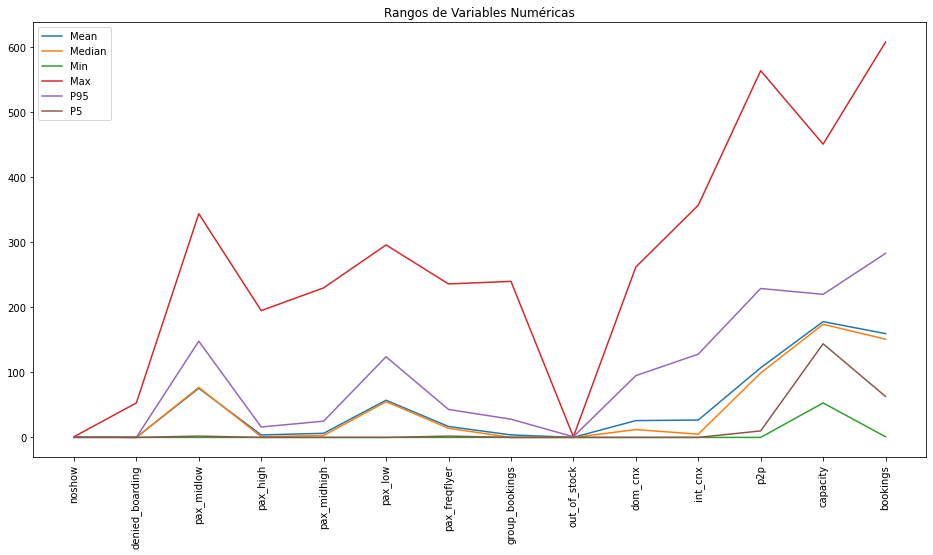

In [5]:
def plot_dist(df):
    plt.figure(figsize = (16, 8))
    plt.plot(df.columns, df.mean(), label = "Mean")
    plt.plot(df.columns, df.median(), label = "Median")
    plt.plot(df.columns, df.min(), label = "Min")
    plt.plot(df.columns, df.max(), label = "Max")
    plt.plot(df.columns, df.quantile(0.95), label = "P95")
    plt.plot(df.columns, df.quantile(0.05), label = "P5")
    plt.xticks(rotation = 90)
    plt.title("Rangos de Variables Numéricas")
    plt.legend();
    
plot_dist(num_data)

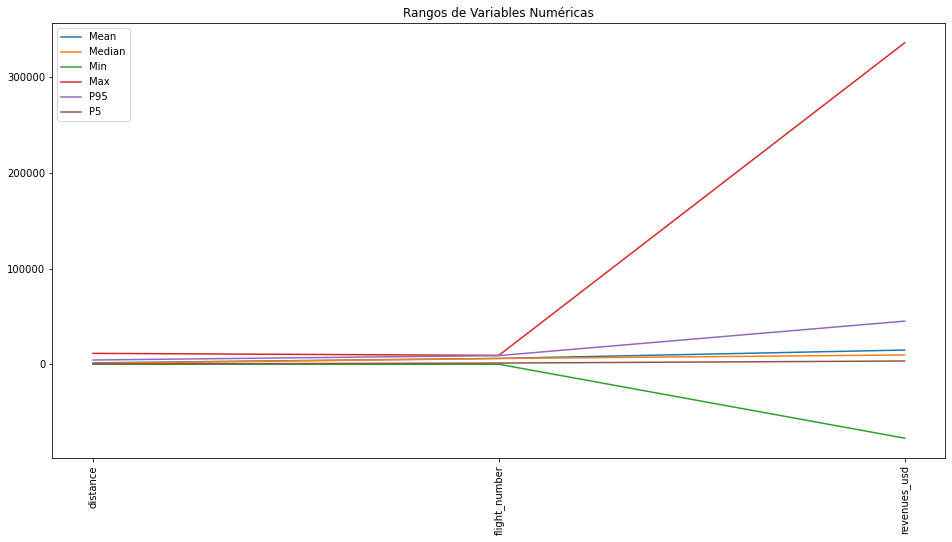

In [6]:
ext_data = df_train[extreme_num]
plot_dist(ext_data)

De la revisión de los atributos numéricos podemos concluir lo siguiente:

* La mayoría de las variables a excepción de `distance`, `flight_number` y `revenue_usd` se encuentran en rangos numéricos relativamente pequeños hasta valores cercanos a 600.
* Si bien `flight_number` viene como número, creemos que es incorrecto considerarlo como tal, y eventualmente será considerado una categoría.
* Se puede apreciar que en general todos poseen valores extremos hacia el lado superior, es decir, con diferencias notables entre el P95 y el valor máximo.
* Quizás la distribución más extrema corresponde a la de `revenue_usd` en el cual sus medidas de tendencia central son muy parecidas y cercanos a cero, y tiene casos de valores muy negativos, y valores muy altos. 

## Distribución de Datos Numéricos

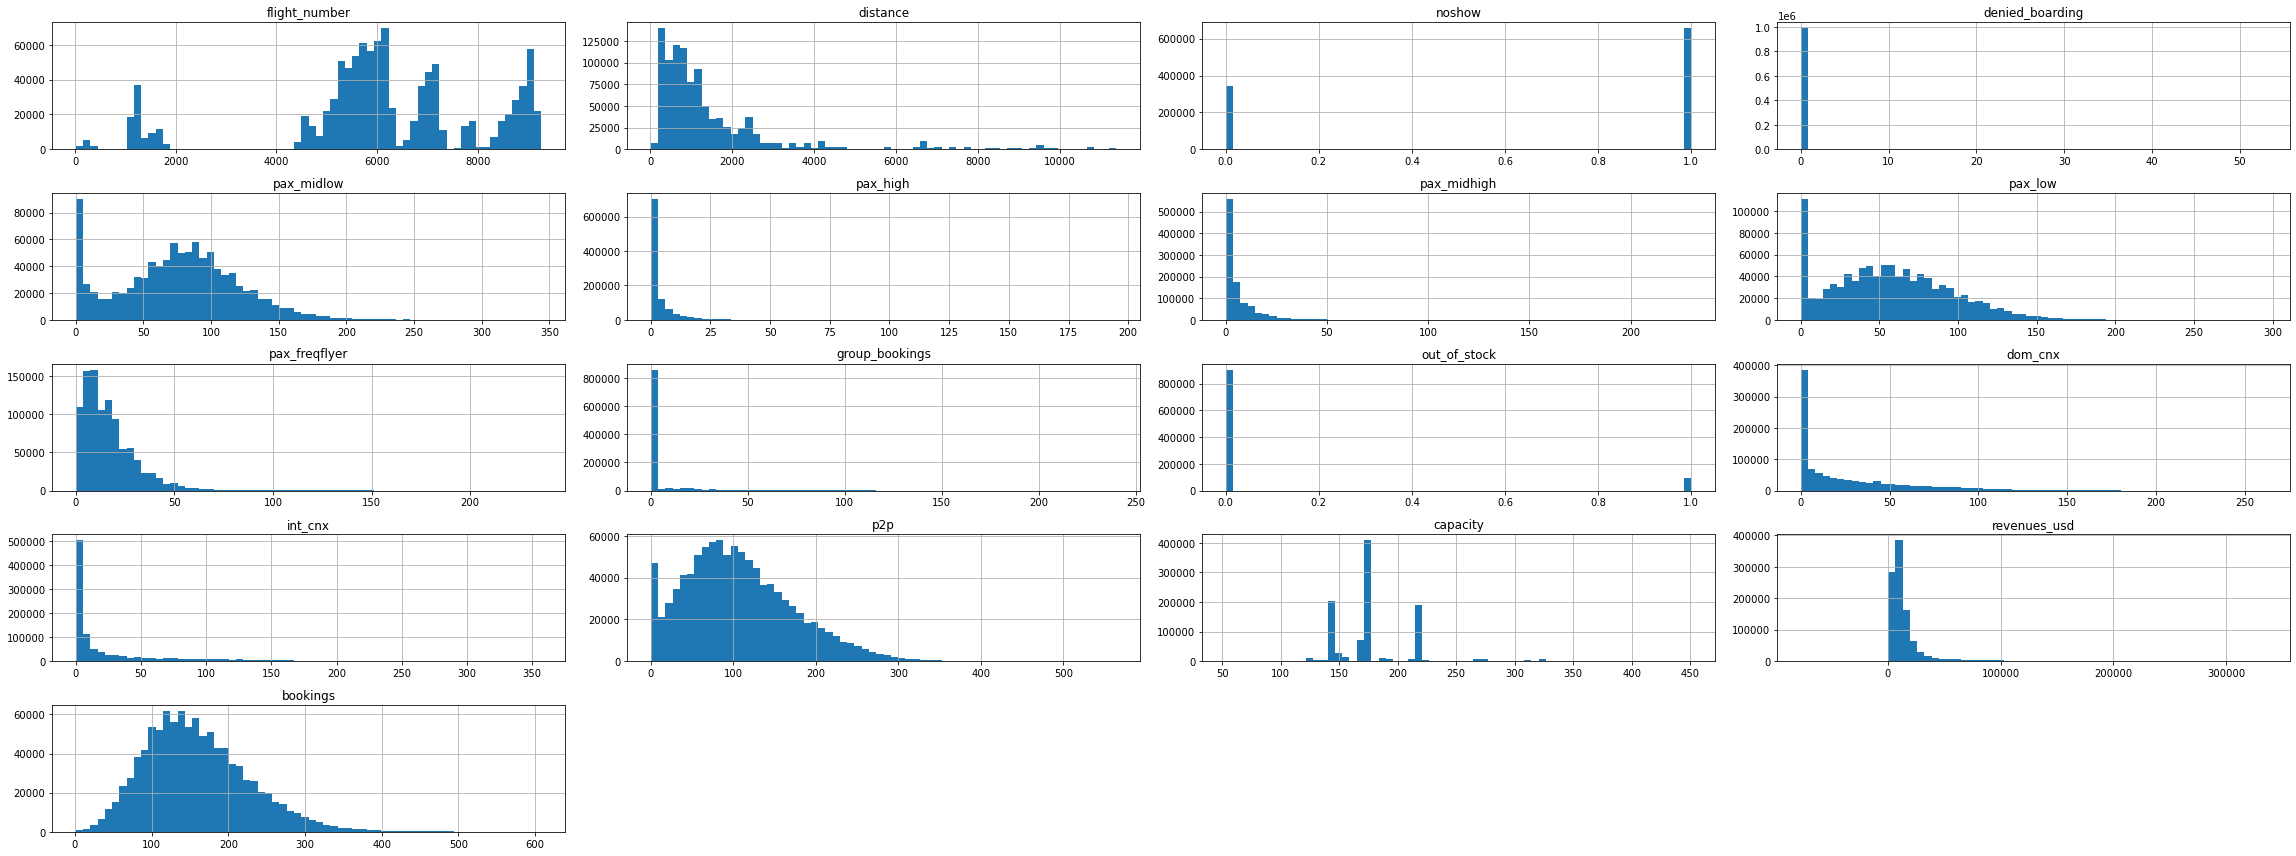

In [7]:
df_train.select_dtypes(np.number).hist(figsize=(32, 12), bins=64)
plt.tight_layout()

* De acá se confirma que `flight_number` no corresponde a una distribución numérica ya que posee varios intervalos sin registro. Esto se debe a la codificación interna que puedan tener los números de vuelo, los cuales no están forzados a ser continuos
* Se puede ver que la mayoría de los atributos están fuertemente cargados hacia la izquierda.
* `distance`, `pax_low`, `pax_freqflyer`, `dom_cnx`, `p2p` y `bookings`, son variables que están concetradas a la izquierda en menor medida que el resto.  Todas (a excepción de `bookings` y quizás `pax_freqflyer`) comparten que tienen una fuerte concentración en el cero. 

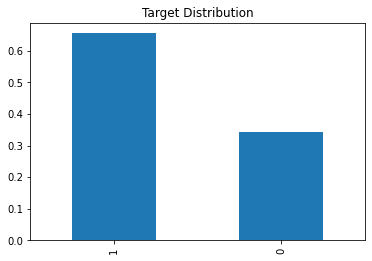

In [8]:
df_train.noshow.value_counts(normalize=True).plot(kind="bar", title="Target Distribution");

* Podemos ver que el vector objetivo está desbalanceado, aunque afortunadamente hacia el fenómeno que nos interesa que es el `noshow`. Se considerará igualmente evaluarlos balanceando las clases.

In [9]:
def create_trip(df): # nueva categoría trip que parea origen y destino
    df["trip"] = df.origin.astype(str) + "-" + df.destination.astype(str)
    return df

df_train = create_trip(df_train)

## Distribución de Datos Catégoricos

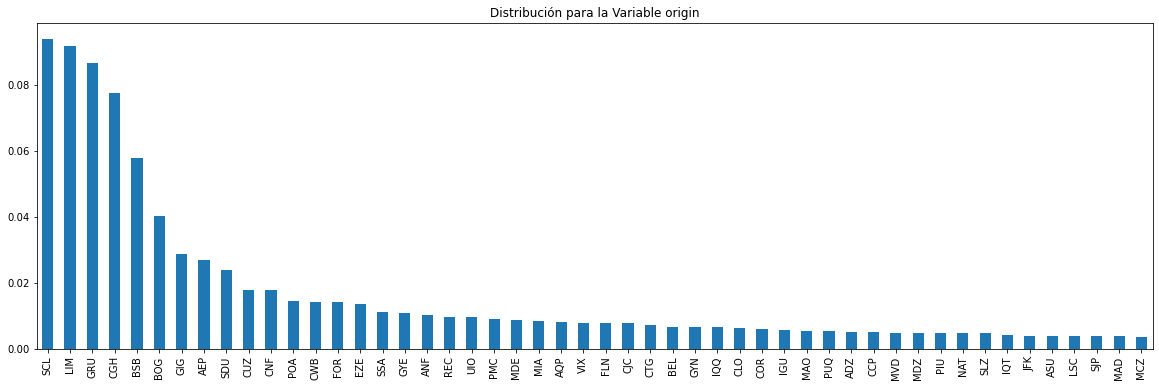

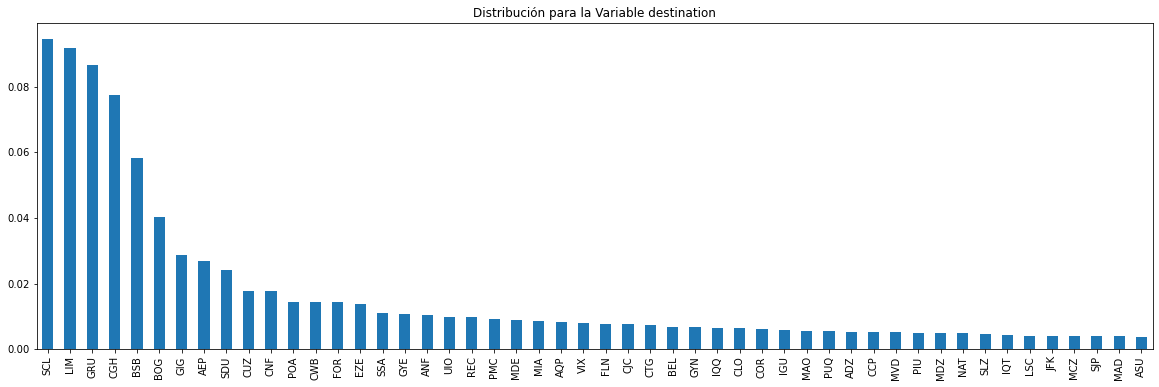

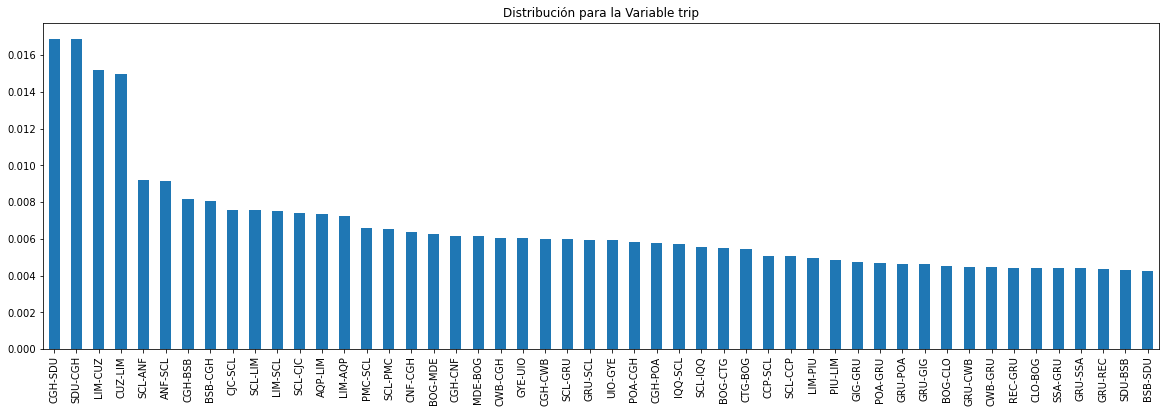

In [10]:
cat_data = df_train.select_dtypes(object).columns
for var in cat_data: 
    df_train[var].value_counts(normalize = True).head(50).plot(kind = "bar", figsize = (20,6))
    plt.title(f"Distribución para la Variable {var}")
    plt.show()


* En general se pueden ver que las variables categóricas tienen una cardinalidad demasiado alta, por lo cual deben ser codificadas con cautela para no explotar el número de features del modelo.
* Se crea la variable `trip` que corresponde a la combinación Origen-Destino del vuelo.
* Se puede ver que no necesariamente los vuelos con mayor cantidad de observaciones tanto en Origen como en Destino son los que poseen mayor cantidad de vuelos en un cierto `trip`. 

* Solo existen 1418 valores ausentes en `departure_time`. Si bien intentamos investigar a que se pueden deber, no logramos encontrar una clara explicación de a qué se deben. Debido a que corresponden a un porcentaje muy menor de los datos, podríamos imputarlos en el modelamiento.

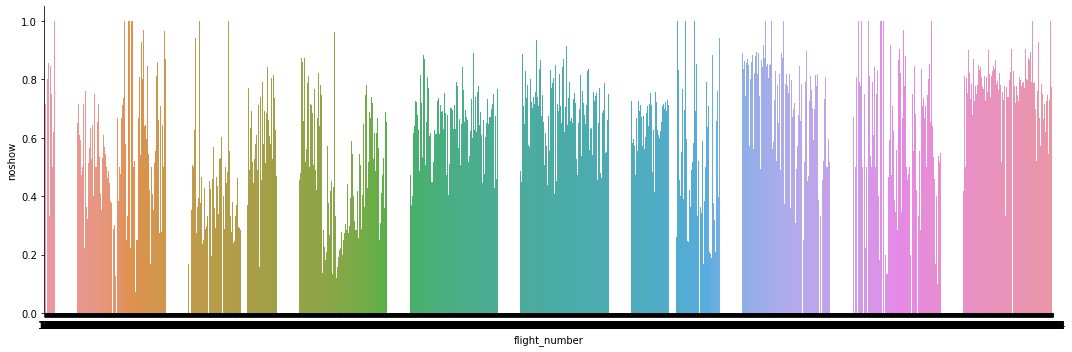

In [11]:
sns.catplot(x = "flight_number", y = "noshow", data = df_train, kind = "bar", estimator = np.mean, ci=None, aspect = 3);

* Se puede observar que el flight_number puede ser un buen predictor, ya que hay varios vuelos que tienen un 100% para la clase 1 de `noshow`.

## Distribución por Fechas

In [12]:
def plot_dates(df, column, label, aspect = 1, rot = False):
    sns.catplot(x = column, data = df, kind = "count", aspect = aspect)
    if rot:
        plt.xticks(rotation = 90)
    plt.show()
    sns.catplot(x = column, y = "noshow", data = df, kind = "bar", estimator = np.mean, ci=None, aspect = aspect)
    plt.title(label = f"Porcentaje Ocurrencia No Show por {label}")
    if rot:
        plt.xticks(rotation = 90)
    plt.show()

In [13]:
df_train.date.agg(["min", "max"])

min   2009-01-02
max   2012-01-08
Name: date, dtype: datetime64[ns]

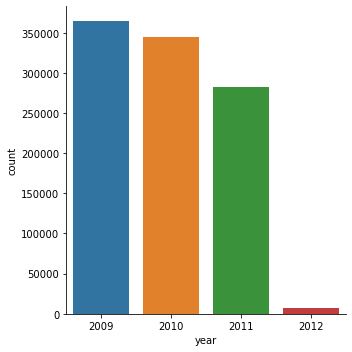

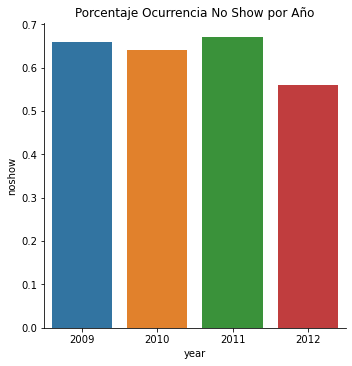

In [14]:
df_train["year"] = df_train.date.dt.year
plot_dates(df_train, "year", label = "Año")

* Si bien se puede observar que hay vuelos entre el 2009 y el 2012, la cantidad de vuelos en el 2012 es muy inferior. Lo cual inicialmente nos podría hacer pensar que no vale la pena incluirlos dentro del modelamiento.

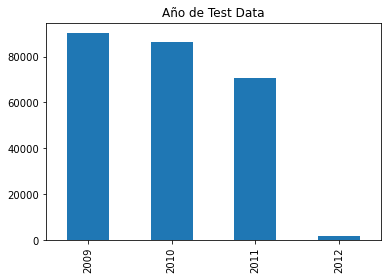

In [15]:
df_test.date.dt.year.value_counts().plot(kind = "bar", title = "Año de Test Data");

* La distribución de vuelos por fecha en el Test es idéntica lo cual, nos da un indidcio de un Data Leakage. Si utilizamos el año podríamos eventualmente obtener un mejor puntaje de predicción. En futuros casos, el año no debería ser un predictor ya que estamos tratando de utilizar el pasado para poder predecir vuelos eventuales en el futuro.

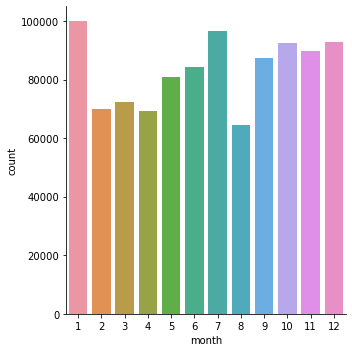

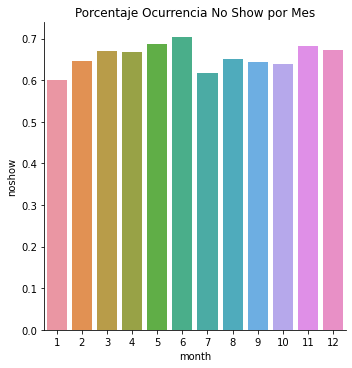

In [16]:
df_train["month"] = df_train.date.dt.month
plot_dates(df_train, "month", label = "Mes")

* Se puede claramente observar que los meses de mayores vuelos son Enero y Julio. Meses de alto flujo de viajes por vacaciones. 
* A pesar de que Enero y Julio son los de más viajes, son los que presentan menos `noshow`, mientras que los meses de temporada baja presentan un alto grado de `noshow`.

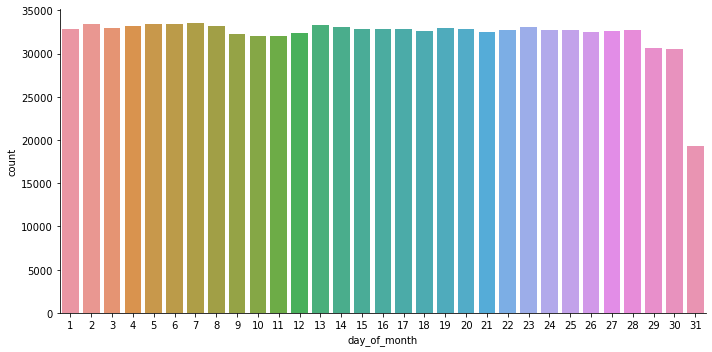

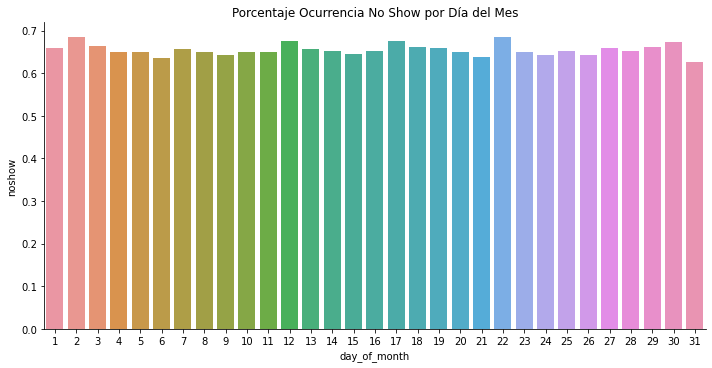

In [17]:
df_train["day_of_month"] = df_train.date.dt.day
plot_dates(df_train, "day_of_month", label = "Día del Mes", aspect = 2)

* Parece ser que los días 2, 12, 17 y 22 son los que presentan mayor grado de `noshow`.

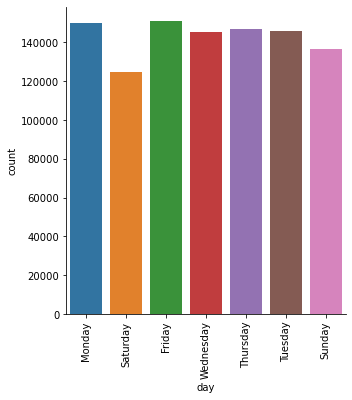

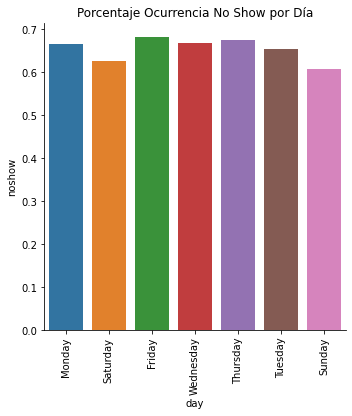

In [18]:
df_train["day"]= df_train.date.dt.day_name()
plot_dates(df_train, "day", label = "Día", rot=True)

* En este caso se puede apreciar que sí existe una relación entre el día en el cual se viaja más y el porcentaje de `noshow`. La distribución es muy similar.

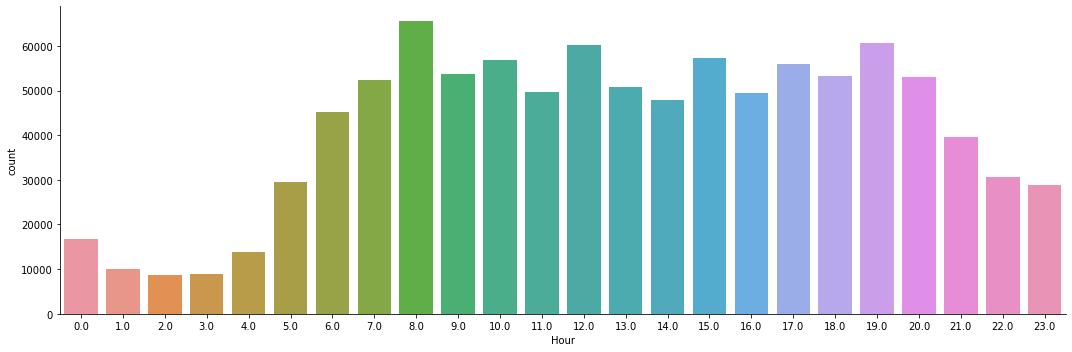

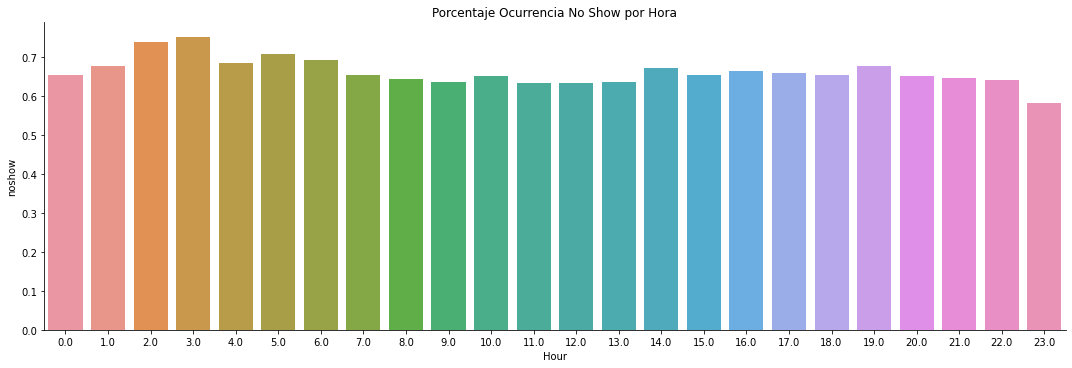

In [19]:
df_train["Hour"]= df_train.departure_time.astype("datetime64").dt.hour
plot_dates(df_train, "Hour", label = "Hora", aspect=3)

* Acá se puede observar que si bien las horas de la madrugada son en las que se viaja menos, son también las que presentan mayor grado de `noshow`.

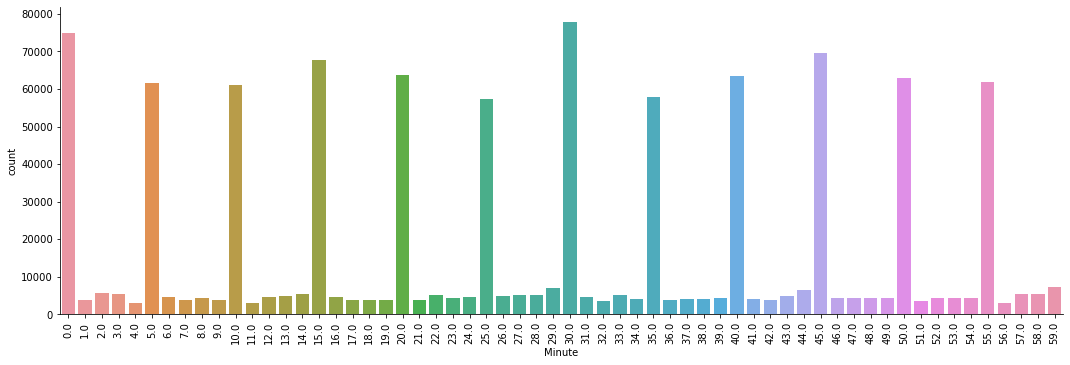

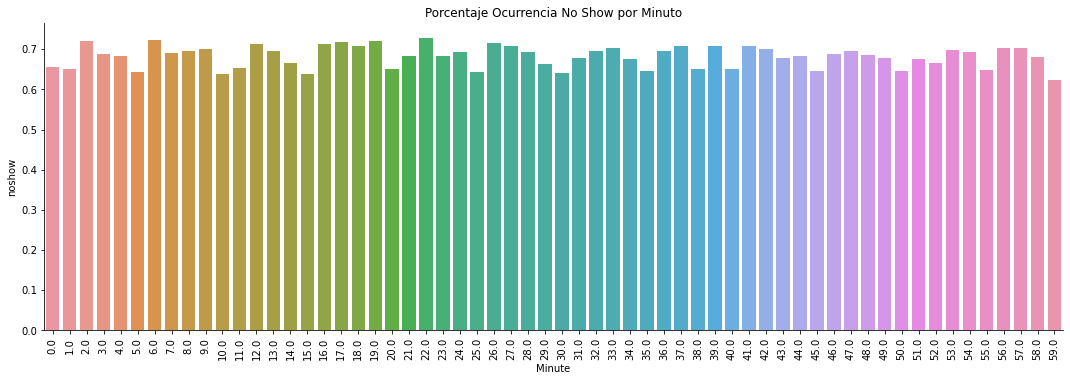

In [20]:
df_train["Minute"]= df_train.departure_time.astype("datetime64").dt.minute
plot_dates(df_train, "Minute", label = "Minuto", aspect=3, rot = True)

* Acá se presenta un patrón muy interesante. La mayoría de los vuelos son a horas cerradas ( en específico cada 5 minutos).
* Lo más interesante es que las horas cerradas son las que presentan menor grado de `noshow`. Esto indica que el mero hecho de tener vuelos a horas irregulares en cierta manera confunde a la gente, que tiende a llegar tarde, o no presentarse.

## Valores Ausentes

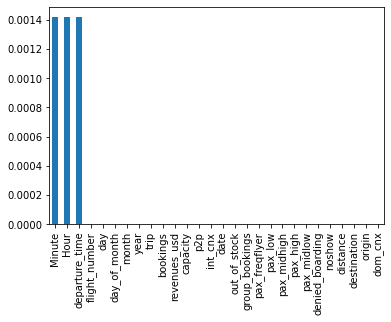

In [21]:
df_train.isnull().mean().sort_values(ascending=False).plot(kind= "bar");

In [22]:
df_test.isnull().sum()

date                 0
flight_number        0
origin               0
destination          0
distance             0
denied_boarding      0
pax_midlow           0
pax_high             0
pax_midhigh          0
pax_low              0
pax_freqflyer        0
group_bookings       0
out_of_stock         0
dom_cnx              0
int_cnx              0
p2p                  0
departure_time     345
capacity             0
revenues_usd         0
bookings             0
dtype: int64

* Se puede ver que sólo hay valores ausentes en la hora de salida. Esto es bastante extraño. Y no existe una manera estándar en la cual se podrían imputar rápidamente.
* No es posible eliminar los nulos del proceso de entrenamiento. De hacerlo, tendríamos que prescindir de este atributo como predictor debido a que en el test set también hay valores nulos en `departure_time` y necesitamos dar una predicción para ellos. Sólo queda la opción de eliminar dicho atributo, o sencillamente buscar una estrategia de imputación adecuada.

## Creación de variables

Se crearán variables adicionales que permitan relacionar algunas ya existentes. Estas nuevas variables estarán principalmente en la forma de ratios. 

In [23]:
def create_ratios(df):
    df["ratio_midlow"] = df.pax_midlow / df.bookings
    df["ratio_high"] = df.pax_high / df.bookings
    df["ratio_midhigh"] = df.pax_midhigh / df.bookings
    df["ratio_low"] = df.pax_low / df.bookings
    df["ratio_freqflyer"] = df.pax_freqflyer / df.bookings
    df["overbooking"] = df.bookings / df.capacity
    df["ratio_dom"] = df.dom_cnx / df.bookings
    df["ratio_int"] = df.int_cnx / df.bookings
    df["ratio_p2p"] = df.p2p / df.bookings
    return df
df_train = create_ratios(df_train)

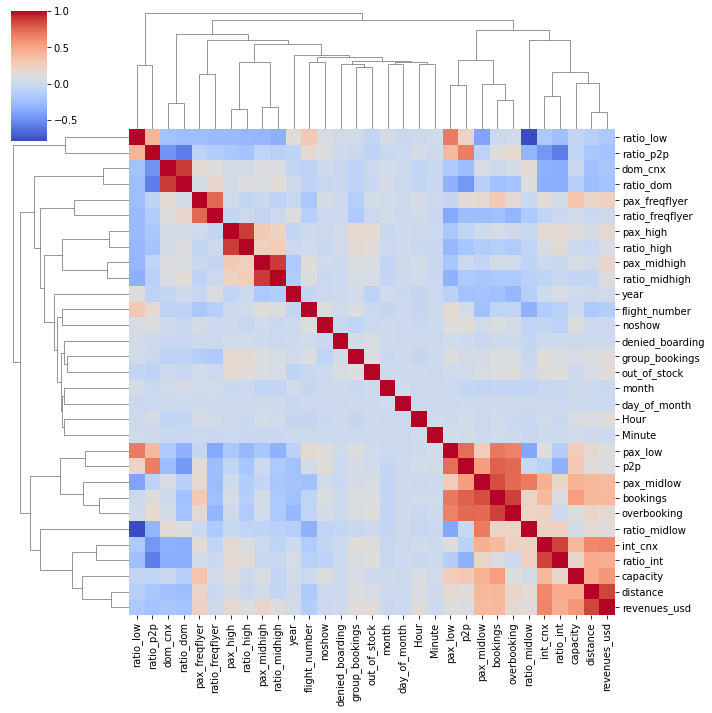

In [24]:
# heatmap de correlaciones
sns.clustermap(df_train.corr(), cmap="coolwarm");

* Se pueden observar un gran cluster de correlacion entre ciertas variables: El primero denota una clara relación entre la capacidad, distancia, y el revneue asociado entre otras. Adicionalmente existen clusters menores que denotan la extrema correlación entre la variable y su ratio recién creado. 

## Modelamiento

In [25]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report
from sklearn.preprocessing import StandardScaler
from feature_engine.encoding import OrdinalEncoder, OneHotEncoder, MeanEncoder
from feature_engine.creation import CyclicalFeatures
from feature_engine.datetime import DatetimeFeatures
from feature_engine.imputation import MeanMedianImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score

## Modelamiento

Se comienza el proceso de Modelamiento generando:

* Features definidas en el proceso de EDA: Features a partir de fechas, hora y ratios.
* Se eliminan posibles features que pueden producir data leakage como: `denied_bioarding`, `out_of_stock` y `year`. La razón por la que eliminamos año es que define un evento único, por lo que el modelo podría memorizar para poder predecir.
* Los valores ausentes son imputados con mediana.
* `flight_number`,`trip`,`origin`, `destination` serán considerados como categoría. Y debido a que el fuerte de nuestros modelos considera árboles, se utilizará un OrdinalEncoder.

In [26]:
def create_time_features(df):
    df["hour"] = df_train.departure_time.dt.hour
    df["minute"] = df_train.departure_time.dt.minute
    return df

In [27]:
df_train = import_data("ALUMNOS-trainData.csv")
df_test = import_data("ALUMNOS-evalData.csv")
df_train["noshow"] = np.where(df_train.noshow > 3, 1, 0)
df_train = df_train.pipe(create_trip).pipe(create_ratios).pipe(create_time_features)
df_test = df_test.pipe(create_trip).pipe(create_ratios).pipe(create_time_features)

In [28]:
def create_time_features(df):
    df["hour"] = df_train.departure_time.dt.hour
    df["minute"] = df_train.departure_time.dt.minute
    return df

In [29]:
X = df_train.drop(columns = ["noshow", "departure_time", "denied_boarding","out_of_stock"])
y = df_train.noshow
# y = np.random.randint(0,2, size = len(X))

X_test = df_test.drop(columns = ["departure_time","denied_boarding","out_of_stock"])
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [30]:
X_train.columns ## Variables a utilizar previo al preprocesamiento.

Index(['date', 'flight_number', 'origin', 'destination', 'distance',
       'pax_midlow', 'pax_high', 'pax_midhigh', 'pax_low', 'pax_freqflyer',
       'group_bookings', 'dom_cnx', 'int_cnx', 'p2p', 'capacity',
       'revenues_usd', 'bookings', 'trip', 'ratio_midlow', 'ratio_high',
       'ratio_midhigh', 'ratio_low', 'ratio_freqflyer', 'overbooking',
       'ratio_dom', 'ratio_int', 'ratio_p2p', 'hour', 'minute'],
      dtype='object')

> Todos nuestros modelos incluirán un proceso de Preprocesamiento (creación de variables, encoding de variables categóricas y extracción de features de fechas) y escalamiento de los datos. Finalmente, se someterán a un post-procesamiento en el que se ajustará el umbral de corte para definir la clase positiva y negativa. 

> Todos los modelos serán evaluados con F1-Score en la clase 0. 

## Modelo Naive Bayes

In [31]:
def training_pipeline(model):
    prep = Pipeline(steps = [
        ("imputer", MeanMedianImputer(imputation_method = "median")),
        ("ord", OrdinalEncoder(encoding_method = "ordered", variables = ["flight_number", "trip","origin", "destination"], ignore_format=True, unseen = "encode")),
        ("dates", DatetimeFeatures(features_to_extract=["day_of_week", "day_of_month", "month"], drop_original=True)),
        ("scaler", StandardScaler())
    ])

    pipe = Pipeline(steps = [("prep", prep),
                            ("clf", model)
    ])
    
    return pipe

gnb = GaussianNB()
pipe = training_pipeline(gnb)
pipe.fit(X_train, y_train)


Pipeline(steps=[('prep',
                 Pipeline(steps=[('imputer', MeanMedianImputer()),
                                 ('ord',
                                  OrdinalEncoder(ignore_format=True,
                                                 unseen='encode',
                                                 variables=['flight_number',
                                                            'trip', 'origin',
                                                            'destination'])),
                                 ('dates',
                                  DatetimeFeatures(features_to_extract=['day_of_week',
                                                                        'day_of_month',
                                                                        'month'])),
                                 ('scaler', StandardScaler())])),
                ('clf', GaussianNB())])

Classification report:
               precision    recall  f1-score   support

           0      0.483     0.679     0.564    240869
           1      0.786     0.618     0.692    459054

    accuracy                          0.639    699923
   macro avg      0.634     0.649     0.628    699923
weighted avg      0.682     0.639     0.648    699923

Classification report:
               precision    recall  f1-score   support

           0      0.483     0.675     0.563    103744
           1      0.782     0.618     0.691    196223

    accuracy                          0.638    299967
   macro avg      0.633     0.647     0.627    299967
weighted avg      0.679     0.638     0.647    299967

f1 Score para la clase 0 es: 0.5630610340722628


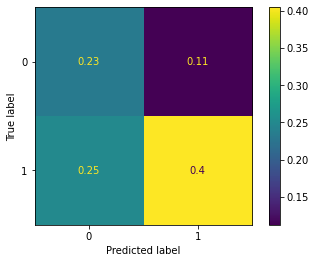

In [32]:
THRESHOLD = 0.79 ## Threshold Óptimo
y_pred_train = np.where(pipe.predict_proba(X_train)[:,1] >= THRESHOLD, 1, 0)
y_pred = np.where(pipe.predict_proba(X_val)[:,1] >= THRESHOLD, 1, 0)
print("Classification report:\n", classification_report(y_train, y_pred_train, digits = 3))
print("Classification report:\n", classification_report(y_val, y_pred, digits = 3))
ConfusionMatrixDisplay.from_predictions(y_val, y_pred, normalize = "all");

print(f"f1 Score para la clase 0 es: {f1_score(y_val, y_pred, pos_label = 0)}")

## Modelo Random Forest

In [33]:
rf_no_reg = RandomForestClassifier(n_estimators = 50 , random_state = 42, n_jobs = -1)
pipe = training_pipeline(rf_no_reg)
pipe.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 Pipeline(steps=[('imputer', MeanMedianImputer()),
                                 ('ord',
                                  OrdinalEncoder(ignore_format=True,
                                                 unseen='encode',
                                                 variables=['flight_number',
                                                            'trip', 'origin',
                                                            'destination'])),
                                 ('dates',
                                  DatetimeFeatures(features_to_extract=['day_of_week',
                                                                        'day_of_month',
                                                                        'month'])),
                                 ('scaler', StandardScaler())])),
                ('clf',
                 RandomForestClassifier(n_estimators=50, n_jobs=-1,
                                        random_state=42))])

Classification report:
               precision    recall  f1-score   support

           0      0.961     1.000     0.980    240869
           1      1.000     0.979     0.989    459054

    accuracy                          0.986    699923
   macro avg      0.980     0.989     0.985    699923
weighted avg      0.987     0.986     0.986    699923

Classification report:
               precision    recall  f1-score   support

           0      0.480     0.768     0.591    103744
           1      0.820     0.560     0.666    196223

    accuracy                          0.632    299967
   macro avg      0.650     0.664     0.628    299967
weighted avg      0.703     0.632     0.640    299967

f1 Score para la clase 0 es: 0.590702846975089


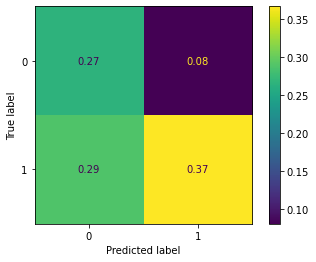

In [34]:
THRESHOLD = 0.71 ## Threshold Óptimo
y_pred_train = np.where(pipe.predict_proba(X_train)[:,1] >= THRESHOLD, 1, 0)
y_pred = np.where(pipe.predict_proba(X_val)[:,1] >= THRESHOLD, 1, 0)
print("Classification report:\n", classification_report(y_train, y_pred_train, digits = 3))
print("Classification report:\n", classification_report(y_val, y_pred, digits = 3))
ConfusionMatrixDisplay.from_predictions(y_val, y_pred, normalize = "all");
print(f"f1 Score para la clase 0 es: {f1_score(y_val, y_pred, pos_label = 0)}")

## Modelo Random Forest + Undersampling

Debido al desbalance de las clases, consideramos que Equilibrar la clase mayoritaria con la minoritaria podría ser de utilidad. Los beneficios de esto, es evitar un alto nivel de sobreajuste y disminuir los tiempos de entrenamiento.

In [35]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imb_Pipeline


def imb_training_pipeline(model):
    rus = RandomUnderSampler(random_state=42)
    pipe = imb_Pipeline(steps = [
        ("rus", rus),
        ("imputer", MeanMedianImputer(imputation_method = "median")),
        ("ord", OrdinalEncoder(encoding_method = "ordered", variables = ["flight_number", "trip","origin", "destination"], ignore_format=True, unseen = "encode")),
        ("dates", DatetimeFeatures(features_to_extract=["day_of_week", "day_of_month", "month"], drop_original=True)),
        ("model", model),
    ])
    
    return pipe
rf = RandomForestClassifier(n_estimators = 50 , random_state = 42, n_jobs = -1)
pipe = imb_training_pipeline(rf)
pipe.fit(X_train, y_train)

Pipeline(steps=[('rus', RandomUnderSampler(random_state=42)),
                ('imputer', MeanMedianImputer()),
                ('ord',
                 OrdinalEncoder(ignore_format=True, unseen='encode',
                                variables=['flight_number', 'trip', 'origin',
                                           'destination'])),
                ('dates',
                 DatetimeFeatures(features_to_extract=['day_of_week',
                                                       'day_of_month',
                                                       'month'])),
                ('model',
                 RandomForestClassifier(n_estimators=50, n_jobs=-1,
                                        random_state=42))])

Classification report:
               precision    recall  f1-score   support

           0      0.737     1.000     0.848    240869
           1      1.000     0.812     0.896    459054

    accuracy                          0.877    699923
   macro avg      0.868     0.906     0.872    699923
weighted avg      0.909     0.877     0.880    699923

Classification report:
               precision    recall  f1-score   support

           0      0.496     0.733     0.592    103744
           1      0.811     0.606     0.694    196223

    accuracy                          0.650    299967
   macro avg      0.654     0.670     0.643    299967
weighted avg      0.702     0.650     0.659    299967

f1 Score para la clase 0 es: 0.5915845918569855


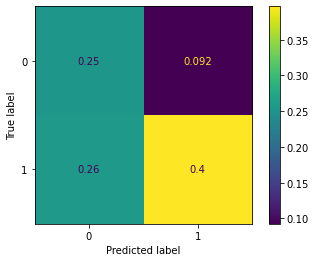

In [36]:
THRESHOLD = 0.55 # Threshold Óptimo
y_pred_train = np.where(pipe.predict_proba(X_train)[:,1] >= THRESHOLD, 1, 0)
y_pred = np.where(pipe.predict_proba(X_val)[:,1] >= THRESHOLD, 1, 0)
print("Classification report:\n", classification_report(y_train, y_pred_train, digits = 3))
print("Classification report:\n", classification_report(y_val, y_pred, digits = 3))
ConfusionMatrixDisplay.from_predictions(y_val, y_pred, normalize = "all");
print(f"f1 Score para la clase 0 es: {f1_score(y_val, y_pred, pos_label = 0)}")

## Stacking 

In [37]:
from sklearn.ensemble import StackingClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=42, max_iter=10000, n_jobs=-1)
et = ExtraTreesClassifier(n_estimators=50, random_state=42, n_jobs=-1)
rf = RandomForestClassifier(n_estimators = 50 , random_state = 42, n_jobs = -1)
sclf = StackingClassifier(estimators = [("rf", rf),("lr", lr), ("et", et)], final_estimator = LogisticRegression(fit_intercept = True, random_state = 42, n_jobs = -1), cv = 5)
pipe = training_pipeline(sclf)
pipe.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 Pipeline(steps=[('imputer', MeanMedianImputer()),
                                 ('ord',
                                  OrdinalEncoder(ignore_format=True,
                                                 unseen='encode',
                                                 variables=['flight_number',
                                                            'trip', 'origin',
                                                            'destination'])),
                                 ('dates',
                                  DatetimeFeatures(features_to_extract=['day_of_week',
                                                                        'day_of_month',
                                                                        'month'])),
                                 ('scaler', StandardScaler())])),
                ('clf',
                 StackingClassifier(cv=5,
                                    estimators=[('rf',
                                                 RandomForestClassifier(n_estimators=50,
                                                                        n_jobs=-1,
                                                                        random_state=42)),
                                                ('lr',
                                                 LogisticRegression(max_iter=10000,
                                                                    n_jobs=-1,
                                                                    random_state=42)),
                                                ('et',
                                                 ExtraTreesClassifier(n_estimators=50,
                                                                      n_jobs=-1,
                                                                      random_state=42))],
                                    final_estimator=LogisticRegression(n_jobs=-1,
                                                                       random_state=42)))])

Classification report:
               precision    recall  f1-score   support

           0      0.996     1.000     0.998    240869
           1      1.000     0.998     0.999    459054

    accuracy                          0.999    699923
   macro avg      0.998     0.999     0.998    699923
weighted avg      0.999     0.999     0.999    699923

Classification report:
               precision    recall  f1-score   support

           0      0.510     0.719     0.597    103744
           1      0.810     0.634     0.712    196223

    accuracy                          0.664    299967
   macro avg      0.660     0.677     0.654    299967
weighted avg      0.706     0.664     0.672    299967

f1 Score para la clase 0 es: 0.5967513023175854


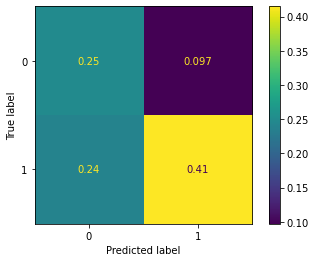

In [38]:
THRESHOLD = 0.71 ## Threshold Óptimo
y_pred_train = np.where(pipe.predict_proba(X_train)[:,1] >= THRESHOLD, 1, 0)
y_pred = np.where(pipe.predict_proba(X_val)[:,1] >= THRESHOLD, 1, 0)
print("Classification report:\n", classification_report(y_train, y_pred_train, digits = 3))
print("Classification report:\n", classification_report(y_val, y_pred, digits = 3))
ConfusionMatrixDisplay.from_predictions(y_val, y_pred, normalize = "all");
print(f"f1 Score para la clase 0 es: {f1_score(y_val, y_pred, pos_label = 0)}")

In [39]:
## Variación del número de Folds para Stacking
lr = LogisticRegression(random_state=42, max_iter=10000, n_jobs=-1)
et = ExtraTreesClassifier(n_estimators=50, random_state=42, n_jobs=-1)
rf = RandomForestClassifier(n_estimators = 50 , random_state = 42, n_jobs = -1)
sclf = StackingClassifier(estimators = [("rf", rf),("lr", lr), ("et", et)], final_estimator = LogisticRegression(fit_intercept = True, random_state = 42, n_jobs = -1), cv = 3)
pipe = training_pipeline(sclf)
pipe.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 Pipeline(steps=[('imputer', MeanMedianImputer()),
                                 ('ord',
                                  OrdinalEncoder(ignore_format=True,
                                                 unseen='encode',
                                                 variables=['flight_number',
                                                            'trip', 'origin',
                                                            'destination'])),
                                 ('dates',
                                  DatetimeFeatures(features_to_extract=['day_of_week',
                                                                        'day_of_month',
                                                                        'month'])),
                                 ('scaler', StandardScaler())])),
                ('clf',
                 StackingClassifier(cv=3,
                                    estimators=[('rf',
                                                 RandomForestClassifier(n_estimators=50,
                                                                        n_jobs=-1,
                                                                        random_state=42)),
                                                ('lr',
                                                 LogisticRegression(max_iter=10000,
                                                                    n_jobs=-1,
                                                                    random_state=42)),
                                                ('et',
                                                 ExtraTreesClassifier(n_estimators=50,
                                                                      n_jobs=-1,
                                                                      random_state=42))],
                                    final_estimator=LogisticRegression(n_jobs=-1,
                                                                       random_state=42)))])

Classification report:
               precision    recall  f1-score   support

           0      0.995     1.000     0.998    240869
           1      1.000     0.997     0.999    459054

    accuracy                          0.998    699923
   macro avg      0.998     0.999     0.998    699923
weighted avg      0.998     0.998     0.998    699923

Classification report:
               precision    recall  f1-score   support

           0      0.509     0.720     0.597    103744
           1      0.810     0.634     0.711    196223

    accuracy                          0.663    299967
   macro avg      0.660     0.677     0.654    299967
weighted avg      0.706     0.663     0.672    299967

f1 Score para la clase 0 es: 0.5965903415651508


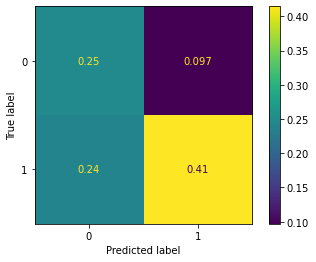

In [40]:
THRESHOLD = 0.71 # Threshold óptimo
y_pred_train = np.where(pipe.predict_proba(X_train)[:,1] >= THRESHOLD, 1, 0)
y_pred = np.where(pipe.predict_proba(X_val)[:,1] >= THRESHOLD, 1, 0)
print("Classification report:\n", classification_report(y_train, y_pred_train, digits = 3))
print("Classification report:\n", classification_report(y_val, y_pred, digits = 3))
ConfusionMatrixDisplay.from_predictions(y_val, y_pred, normalize = "all");
print(f"f1 Score para la clase 0 es: {f1_score(y_val, y_pred, pos_label = 0)}")

## Stacking + Undersampling

In [41]:
from sklearn.ensemble import StackingClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=42, max_iter=10000)
et = ExtraTreesClassifier(n_estimators=50, random_state=42, n_jobs=-1)
rf = RandomForestClassifier(n_estimators = 50 , random_state = 42, n_jobs = -1)
sclf = StackingClassifier(estimators = [("rf", rf),("lr", lr), ("et", et)], final_estimator = LogisticRegression(fit_intercept = True, random_state = 42), cv = 3)
pipe = imb_training_pipeline(sclf)
pipe.fit(X_train, y_train)

Pipeline(steps=[('rus', RandomUnderSampler(random_state=42)),
                ('imputer', MeanMedianImputer()),
                ('ord',
                 OrdinalEncoder(ignore_format=True, unseen='encode',
                                variables=['flight_number', 'trip', 'origin',
                                           'destination'])),
                ('dates',
                 DatetimeFeatures(features_to_extract=['day_of_week',
                                                       'day_of_month',
                                                       'month'])),
                ('model',
                 StackingClassifier(cv=3,
                                    estimators=[('rf',
                                                 RandomForestClassifier(n_estimators=50,
                                                                        n_jobs=-1,
                                                                        random_state=42)),
                                                ('lr',
                                                 LogisticRegression(max_iter=10000,
                                                                    random_state=42)),
                                                ('et',
                                                 ExtraTreesClassifier(n_estimators=50,
                                                                      n_jobs=-1,
                                                                      random_state=42))],
                                    final_estimator=LogisticRegression(random_state=42)))])

Classification report:
               precision    recall  f1-score   support

           0      0.746     1.000     0.854    240869
           1      1.000     0.821     0.902    459054

    accuracy                          0.883    699923
   macro avg      0.873     0.910     0.878    699923
weighted avg      0.912     0.883     0.885    699923

Classification report:
               precision    recall  f1-score   support

           0      0.504     0.726     0.595    103744
           1      0.811     0.623     0.705    196223

    accuracy                          0.658    299967
   macro avg      0.658     0.674     0.650    299967
weighted avg      0.705     0.658     0.667    299967

f1 Score para la clase 0 es: 0.59516951730732


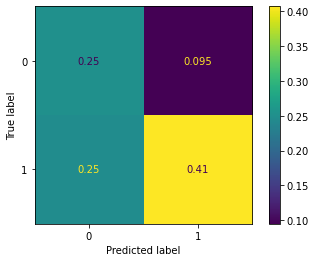

In [42]:
THRESHOLD = 0.55 # Threshold óptimo
y_pred_train = np.where(pipe.predict_proba(X_train)[:,1] >= THRESHOLD, 1, 0)
y_pred = np.where(pipe.predict_proba(X_val)[:,1] >= THRESHOLD, 1, 0)
print("Classification report:\n", classification_report(y_train, y_pred_train, digits = 3))
print("Classification report:\n", classification_report(y_val, y_pred, digits = 3))
ConfusionMatrixDisplay.from_predictions(y_val, y_pred, normalize = "all");
print(f"f1 Score para la clase 0 es: {f1_score(y_val, y_pred, pos_label = 0)}")

> El mejor modelo obtenido es:

* Stacking de 3 modelos: Logistic Regression, RandomForest y ExtraTrees (Variante de Random Forest). Se utilizó para la generación de Meta Features un Cross Validation de 3 Folds.
* Se utilizó un post procesamiento con un Threshold de 0.71.
* Se aplicó el modelo utilizando toda la data y se validó utilizando Holdout con un 30% para validar. Se considera que este tipo de validación es representativa dado que tenemos una gran cantidad de datos para entrenar.
* A continuación se reentrenará el modelo utilizando toda la data de entrenamiento para generar las predicciones a presentar. 

In [43]:
# Reentrenamiento con toda la data de entrenamiento

lr = LogisticRegression(random_state=42, max_iter=10000, n_jobs=-1)
et = ExtraTreesClassifier(n_estimators=50, random_state=42, n_jobs=-1)
rf = RandomForestClassifier(n_estimators = 50 , random_state = 42, n_jobs = -1)
sclf = StackingClassifier(estimators = [("rf", rf),("lr", lr), ("et", et)], final_estimator = LogisticRegression(fit_intercept = True, random_state = 42, n_jobs = -1), cv = 3)
pipe = training_pipeline(sclf)
pipe.fit(X, y)

Pipeline(steps=[('prep',
                 Pipeline(steps=[('imputer', MeanMedianImputer()),
                                 ('ord',
                                  OrdinalEncoder(ignore_format=True,
                                                 unseen='encode',
                                                 variables=['flight_number',
                                                            'trip', 'origin',
                                                            'destination'])),
                                 ('dates',
                                  DatetimeFeatures(features_to_extract=['day_of_week',
                                                                        'day_of_month',
                                                                        'month'])),
                                 ('scaler', StandardScaler())])),
                ('clf',
                 StackingClassifier(cv=3,
                                    estimators=[('rf',
                                                 RandomForestClassifier(n_estimators=50,
                                                                        n_jobs=-1,
                                                                        random_state=42)),
                                                ('lr',
                                                 LogisticRegression(max_iter=10000,
                                                                    n_jobs=-1,
                                                                    random_state=42)),
                                                ('et',
                                                 ExtraTreesClassifier(n_estimators=50,
                                                                      n_jobs=-1,
                                                                      random_state=42))],
                                    final_estimator=LogisticRegression(n_jobs=-1,
                                                                       random_state=42)))])

## Generación del Archivo de Predicción

In [44]:
THRESHOLD = 0.71 # Threshold óptimo
y_pred = np.where(pipe.predict_proba(X_test)[:,1] >= THRESHOLD, 1, 0)
pd.Series(y_pred, name = "pred").to_csv("submission_AA_AT.csv", index = False, header = False)